<a href="https://colab.research.google.com/github/decadeofdata/Inflation-data-science/blob/main/Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning shows how the money supply increases inflation

*   Importing data.
*   Data exporation.
*   Data cleaning.
*   Coorelation matrix.
*   Linear regression model.
*   Conlcusion



In [1]:
#Imports
import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from  pandas import json_normalize
from sklearn import linear_model #maybe
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data

Downloaded from the European Central Bank's Statistical Data Warehouse. <br />
https://sdw.ecb.europa.eu/

In [2]:
# Mount Google drive and data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Full Eurozone inflation data annual percentage changes
rate_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Inflation/Data/EuroInflation.csv', header=0, infer_datetime_format=True, parse_dates=['date'])
rate_df

,date,conf,comment,status1,s1
0,1999-01-30 24:00:00,NaN,Introduction of harmonised treatment of price ...,Normal value,0.8
1,1999-02-27 24:00:00,NaN,NaN,Normal value,0.7
2,1999-03-30 24:00:00,NaN,NaN,Normal value,0.9
3,1999-04-29 24:00:00,NaN,NaN,Normal value,1.1
4,1999-05-30 24:00:00,NaN,NaN,Normal value,0.9
...,...,...,...,...,...
278,2022-03-30 24:00:00,NaN,NaN,Normal value,7.4
279,2022-04-29 24:00:00,NaN,NaN,Normal value,7.4
280,2022-05-30 24:00:00,NaN,NaN,Normal value,8.1
281,2022-06-29 24:00:00,NaN,NaN,Normal value,8.6


In [4]:
# Eurozone M3 data annual percentage changes
eurozone_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Inflation/Data/EuroM3.csv', header=0, infer_datetime_format=True, parse_dates=[1])
eurozone_df

,date,conf,status1,s1
0,1981-01-31,NaT,Normal value,10.2
1,1981-02-28,NaT,Normal value,10.5
2,1981-03-31,NaT,Normal value,10.4
3,1981-04-30,NaT,Normal value,10.8
4,1981-05-31,NaT,Normal value,11.2
...,...,...,...,...
493,2022-02-28,NaT,Normal value,6.4
494,2022-03-31,NaT,Normal value,6.2
495,2022-04-30,NaT,Normal value,6.1
496,2022-05-31,NaT,Normal value,5.8


In [5]:
# Eurozone M3 aggregate
m3_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Inflation/Data/m3.csv', header=0, infer_datetime_format=True, parse_dates=[0])
m3_df


,date,conf,status1,s1
0,1980-01-31,NaN,Normal value,1097404
1,1980-02-29,NaN,Normal value,1105520
2,1980-03-31,NaN,Normal value,1117228
3,1980-04-30,NaN,Normal value,1122639
4,1980-05-31,NaN,Normal value,1130672
...,...,...,...,...
505,2022-02-28,NaN,Normal value,15606596
506,2022-03-31,NaN,Normal value,15670716
507,2022-04-30,NaN,Normal value,15729738
508,2022-05-31,NaN,Normal value,15764395


## Data exploration

**Eurozone inflation - Rates of change**

In [6]:
rate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     283 non-null    object 
 1   conf     0 non-null      float64
 2   comment  9 non-null      object 
 3   status1  283 non-null    object 
 4   s1       283 non-null    float64
dtypes: float64(2), object(3)
memory usage: 11.2+ KB


In [7]:
rate_df['date'] = rate_df['date'].str[:7]
rate_df

,date,conf,comment,status1,s1
0,1999-01,NaN,Introduction of harmonised treatment of price ...,Normal value,0.8
1,1999-02,NaN,NaN,Normal value,0.7
2,1999-03,NaN,NaN,Normal value,0.9
3,1999-04,NaN,NaN,Normal value,1.1
4,1999-05,NaN,NaN,Normal value,0.9
...,...,...,...,...,...
278,2022-03,NaN,NaN,Normal value,7.4
279,2022-04,NaN,NaN,Normal value,7.4
280,2022-05,NaN,NaN,Normal value,8.1
281,2022-06,NaN,NaN,Normal value,8.6


In [8]:
fig = px.line(rate_df, x = 'date', y ="s1", title = 'Eurozone inflation rate',
              labels = {"date": "Date",
                     "s1": "Rate of inflation",
                 })
fig.show()

**Money supply - M3 - Rates of change**

In [9]:
eurozone_df['date'] = eurozone_df['date'].str[:7]
eurozone_df

,date,conf,status1,s1
0,1981-01,NaT,Normal value,10.2
1,1981-02,NaT,Normal value,10.5
2,1981-03,NaT,Normal value,10.4
3,1981-04,NaT,Normal value,10.8
4,1981-05,NaT,Normal value,11.2
...,...,...,...,...
493,2022-02,NaT,Normal value,6.4
494,2022-03,NaT,Normal value,6.2
495,2022-04,NaT,Normal value,6.1
496,2022-05,NaT,Normal value,5.8


In [10]:
fig = px.line(eurozone_df, x = 'date', y="s1", title= 'Eurozone money supply - M3', 
              labels={"date": "Date",
                     "s1": "Rate of money supply",
                 })
fig.show()

**M3 - Money supply aggregate**

In [11]:
m3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     510 non-null    datetime64[ns]
 1   conf     0 non-null      float64       
 2   status1  510 non-null    object        
 3   s1       510 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 16.1+ KB


In [12]:
#Limitting date to match inflation earliest date. 
m3_df = m3_df[~(m3_df['date'] < '1997-01')]
m3_df

,date,conf,status1,s1
204,1997-01-31,NaN,Normal value,4040762
205,1997-02-28,NaN,Normal value,4054012
206,1997-03-31,NaN,Normal value,4061573
207,1997-04-30,NaN,Normal value,4068933
208,1997-05-31,NaN,Normal value,4097362
...,...,...,...,...
505,2022-02-28,NaN,Normal value,15606596
506,2022-03-31,NaN,Normal value,15670716
507,2022-04-30,NaN,Normal value,15729738
508,2022-05-31,NaN,Normal value,15764395


In [13]:
m3_df = m3_df[['date', 's1']]
m3_df

,date,s1
204,1997-01-31,4040762
205,1997-02-28,4054012
206,1997-03-31,4061573
207,1997-04-30,4068933
208,1997-05-31,4097362
...,...,...
505,2022-02-28,15606596
506,2022-03-31,15670716
507,2022-04-30,15729738
508,2022-05-31,15764395


In [14]:
m3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 204 to 509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    306 non-null    datetime64[ns]
 1   s1      306 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 7.2 KB


In [15]:
# remove own index with default index
m3_df.reset_index(inplace = True, drop = True)
m3_df

,date,s1
0,1997-01-31,4040762
1,1997-02-28,4054012
2,1997-03-31,4061573
3,1997-04-30,4068933
4,1997-05-31,4097362
...,...,...
301,2022-02-28,15606596
302,2022-03-31,15670716
303,2022-04-30,15729738
304,2022-05-31,15764395


In [16]:
m3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    306 non-null    datetime64[ns]
 1   s1      306 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


In [17]:
fig = px.line(m3_df, x = "date", y="s1", title= 'Eurozone M3 - Money supply', 
              labels={"date": "Date",
                     "s1": "Money supply",
                 })
fig.show()

**Eurozone - ICP**

https://sdw.ecb.europa.eu/browseTable.do?org.apache.struts.taglib.html.TOKEN=9bdd2ad81ed7e53d132e8bd522f1b0f3&df=true&ec=&dc=&oc=&pb=&rc=&DATASET=0&removeItem=&removedItemList=&mergeFilter=&activeTab=ICP&showHide=&MAX_DOWNLOAD_SERIES=500&SERIES_MAX_NUM=50&node=1496

In [18]:
# Eurozone ICP whole
icp_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Inflation/Data/icp.csv', header=0, infer_datetime_format=True, parse_dates=[0])
icp_df


,KEY,FREQ,REF_AREA,ADJUSTMENT,ICP_ITEM,STS_INSTITUTION,ICP_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,...,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,SOURCE_AGENCY,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,1997-01,72.81596,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
1,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,1997-02,72.79154,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
2,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,1997-03,72.77152,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
3,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,1997-04,72.76295,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
4,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,1997-05,72.86871,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,2022-03,114.48569,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
303,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,2022-04,114.63168,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
304,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,2022-05,115.46533,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0
305,ICP.M.U2.Y.000000.3.INX,M,U2,Y,0,3,INX,2022-06,116.33318,A,...,NaN,2015 = 100,NaN,NaN,2,4F0,HICP - Overall index,Euro area (changing composition) - HICP - Over...,PURE_NUMB,0


In [19]:
icp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   KEY              307 non-null    object 
 1   FREQ             307 non-null    object 
 2   REF_AREA         307 non-null    object 
 3   ADJUSTMENT       307 non-null    object 
 4   ICP_ITEM         307 non-null    int64  
 5   STS_INSTITUTION  307 non-null    int64  
 6   ICP_SUFFIX       307 non-null    object 
 7   TIME_PERIOD      307 non-null    object 
 8   OBS_VALUE        307 non-null    float64
 9   OBS_STATUS       307 non-null    object 
 10  OBS_CONF         307 non-null    object 
 11  OBS_PRE_BREAK    0 non-null      float64
 12  OBS_COM          10 non-null     object 
 13  TIME_FORMAT      307 non-null    object 
 14  BREAKS           0 non-null      float64
 15  COLLECTION       307 non-null    object 
 16  COMPILING_ORG    0 non-null      float64
 17  DATA_COMP       

In [20]:
icp_df = icp_df[['TIME_PERIOD', 'OBS_VALUE']]
icp_df

,TIME_PERIOD,OBS_VALUE
0,1997-01,72.81596
1,1997-02,72.79154
2,1997-03,72.77152
3,1997-04,72.76295
4,1997-05,72.86871
...,...,...
302,2022-03,114.48569
303,2022-04,114.63168
304,2022-05,115.46533
305,2022-06,116.33318


In [21]:
icp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TIME_PERIOD  307 non-null    object 
 1   OBS_VALUE    307 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [22]:
fig = px.line(icp_df, x = "TIME_PERIOD", y="OBS_VALUE", title= 'Eurozone ICP - Inflation', 
              labels={"TIME_PERIOD": "Date",
                     "OBS_VALUE": "ICP",
                 })
fig.show()

## Data cleaning

**Merge datasets**

Merging the data sets with the rates of change.

In [23]:
eurozone_df = pd.merge(rate_df, eurozone_df, how='inner', left_index=True, right_index=True)
eurozone_df


,date_x,conf_x,comment,status1_x,s1_x,date_y,conf_y,status1_y,s1_y
0,1999-01,NaN,Introduction of harmonised treatment of price ...,Normal value,0.8,1981-01,NaT,Normal value,10.2
1,1999-02,NaN,NaN,Normal value,0.7,1981-02,NaT,Normal value,10.5
2,1999-03,NaN,NaN,Normal value,0.9,1981-03,NaT,Normal value,10.4
3,1999-04,NaN,NaN,Normal value,1.1,1981-04,NaT,Normal value,10.8
4,1999-05,NaN,NaN,Normal value,0.9,1981-05,NaT,Normal value,11.2
...,...,...,...,...,...,...,...,...,...
278,2022-03,NaN,NaN,Normal value,7.4,2004-03,NaT,Normal value,6.3
279,2022-04,NaN,NaN,Normal value,7.4,2004-04,NaT,Normal value,5.4
280,2022-05,NaN,NaN,Normal value,8.1,2004-05,NaT,Normal value,4.9
281,2022-06,NaN,NaN,Normal value,8.6,2004-06,NaT,Normal value,5.4


In [24]:
eurozone_df.rename(columns = {'s1_x':'inflation', 's1_y':'money_supply'}, inplace = True)
eurozone_df

,date_x,conf_x,comment,status1_x,inflation,date_y,conf_y,status1_y,money_supply
0,1999-01,NaN,Introduction of harmonised treatment of price ...,Normal value,0.8,1981-01,NaT,Normal value,10.2
1,1999-02,NaN,NaN,Normal value,0.7,1981-02,NaT,Normal value,10.5
2,1999-03,NaN,NaN,Normal value,0.9,1981-03,NaT,Normal value,10.4
3,1999-04,NaN,NaN,Normal value,1.1,1981-04,NaT,Normal value,10.8
4,1999-05,NaN,NaN,Normal value,0.9,1981-05,NaT,Normal value,11.2
...,...,...,...,...,...,...,...,...,...
278,2022-03,NaN,NaN,Normal value,7.4,2004-03,NaT,Normal value,6.3
279,2022-04,NaN,NaN,Normal value,7.4,2004-04,NaT,Normal value,5.4
280,2022-05,NaN,NaN,Normal value,8.1,2004-05,NaT,Normal value,4.9
281,2022-06,NaN,NaN,Normal value,8.6,2004-06,NaT,Normal value,5.4


**ICP and M3 aggregates**

In [25]:
inflation_df = pd.merge(m3_df, icp_df,  how='inner', left_index=True, right_index=True)
inflation_df


,date,s1,TIME_PERIOD,OBS_VALUE
0,1997-01-31,4040762,1997-01,72.81596
1,1997-02-28,4054012,1997-02,72.79154
2,1997-03-31,4061573,1997-03,72.77152
3,1997-04-30,4068933,1997-04,72.76295
4,1997-05-31,4097362,1997-05,72.86871
...,...,...,...,...
301,2022-02-28,15606596,2022-02,112.51921
302,2022-03-31,15670716,2022-03,114.48569
303,2022-04-30,15729738,2022-04,114.63168
304,2022-05-31,15764395,2022-05,115.46533


In [26]:
inflation_df = inflation_df[['date', 's1', 'OBS_VALUE']]
inflation_df


,date,s1,OBS_VALUE
0,1997-01-31,4040762,72.81596
1,1997-02-28,4054012,72.79154
2,1997-03-31,4061573,72.77152
3,1997-04-30,4068933,72.76295
4,1997-05-31,4097362,72.86871
...,...,...,...
301,2022-02-28,15606596,112.51921
302,2022-03-31,15670716,114.48569
303,2022-04-30,15729738,114.63168
304,2022-05-31,15764395,115.46533


In [27]:
inflation_df.rename(columns = {'s1':'m3', 'OBS_VALUE':'icp'}, inplace = True)
inflation_df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,m3,icp
0,1997-01-31,4040762,72.81596
1,1997-02-28,4054012,72.79154
2,1997-03-31,4061573,72.77152
3,1997-04-30,4068933,72.76295
4,1997-05-31,4097362,72.86871
...,...,...,...
301,2022-02-28,15606596,112.51921
302,2022-03-31,15670716,114.48569
303,2022-04-30,15729738,114.63168
304,2022-05-31,15764395,115.46533


In [28]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    306 non-null    datetime64[ns]
 1   m3      306 non-null    int64         
 2   icp     306 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 9.6 KB


## Correlation matrix

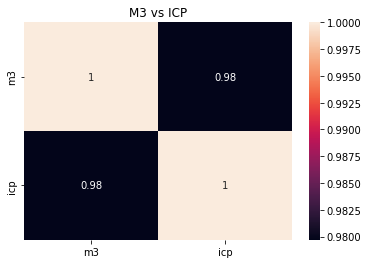

In [29]:
matrix = inflation_df.corr()
sns.heatmap(matrix, annot=True).set(title='M3 vs ICP')
plt.show()

In [30]:
fig = px.imshow(matrix, text_auto=True, title='M3 vs ICP')
fig.show()

## Linear regression model

**Rates of change**

Code: https://www.geeksforgeeks.org/linear-regression-python-implementation/#:~:text=This%20article%20discusses%20the%20basics,given%20set%20of%20independent%20variables.

Eurozone Rates: Money Supply vs Inflation


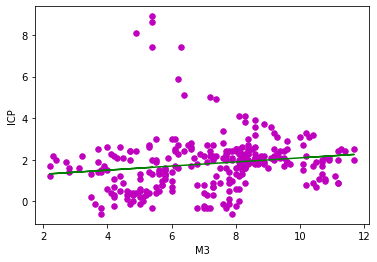

In [31]:
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('M3')
	plt.ylabel('ICP')

	# function to show plot
	plt.show()

def main():
	print("Eurozone Rates: Money Supply vs Inflation")
	# observations / data
	x = eurozone_df['money_supply'] # Predictor
	y = eurozone_df['inflation'] # Reponse

	# estimating coefficients
	b = estimate_coef(x, y)
	#print("Estimated coefficients:\nb_0 = {} \
		#\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


In [32]:
fig = px.scatter(eurozone_df, x="money_supply", y="inflation", 
                 opacity = .8,
                 trendline="ols", title = "Eurozone rates: Money Supply vs Inflation", color = 'inflation', 
                 labels={"money_supply": "Money supply",
                     "inflation": "Inflation"
                 })
fig.data[1].line.color = 'green'
fig.data[1].line.width = 3

fig.show()

**M3 vs ICP aggregates**

Eurozone aggregates: Money Supply vs Inflation


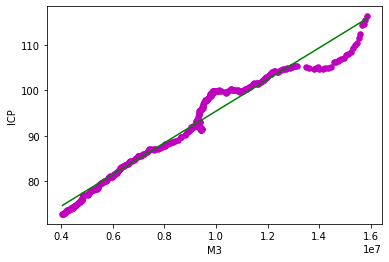

In [33]:
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('M3')
	plt.ylabel('ICP')

	# function to show plot
	plt.show()
 
	

def main():
	print("Eurozone aggregates: Money Supply vs Inflation")
	# observations / data
	x = inflation_df['m3'] # Predictor
	y = inflation_df['icp'] # Reponse

	# estimating coefficients
	b = estimate_coef(x, y)
	#print("Estimated coefficients:\nb_0 = {} \
		#\nb_1 = {}".format(b[0], b[1]))

	# plotting regression line
	plot_regression_line(x, y, b)

if __name__ == "__main__":
	main()


In [34]:
fig = px.scatter(inflation_df, x="m3", y="icp", 
                 opacity = .8,
                 trendline="ols", title = "Eurozone aggregates: Money Supply vs Inflation", color = 'icp', 
                 labels={"m3": "M3",
                     "icp": "ICP",
                 })
fig.data[1].line.color = 'green'
fig.data[1].line.width = 3

fig.show()

In [35]:
results = px.get_trendline_results(fig)
print(results)


                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


In [36]:
fig = px.scatter(inflation_df, x="m3", y="icp", 
                 color_discrete_sequence = ['purple'],
                 opacity = .5,
                 trendline="ols", title = "Eurozone aggregates: Money Supply vs Inflation", 
                 labels={"m3": "M3",
                     "icp": "ICP",
                 })
fig.data[1].line.color = 'green'
fig.data[1].line.width = 3

fig.show()


